reading the network file  : HVR_3.txt
reading the metadata file : metadata_CysPoLV.txt



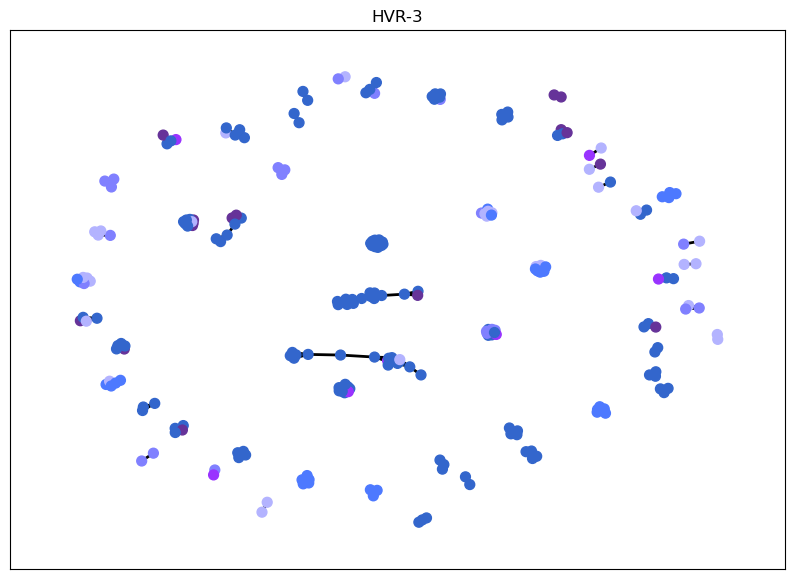

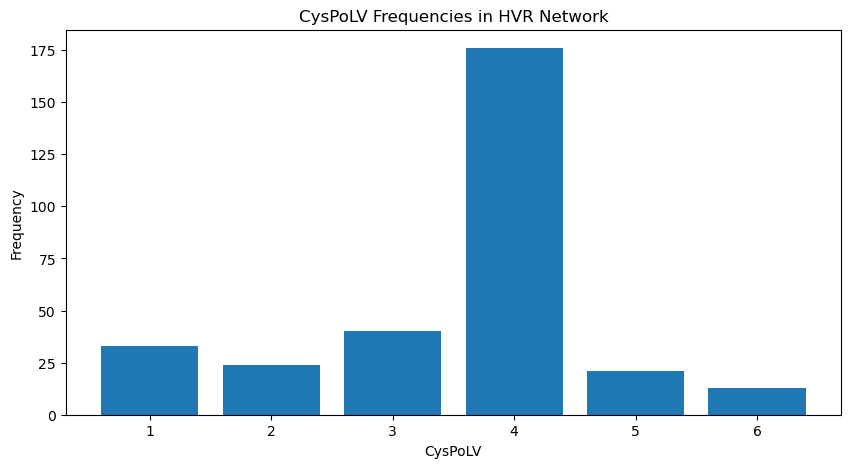

number of nodes, n  = 256
number of edges, m  = 659
mean degree,    <k> =  5.15
clustering coefficient, C     =  0.97


In [3]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import sys
from sklearn import metrics

def draw_network_with_colors(graph, node_labels):

    label_colors = ['#4d79ff', '#8080ff', '#b3b3ff', '#3366cc', '#663399', '#9933ff', '#cc66ff']
    node_colors = [label_colors[int(node_labels[node]) - 1] for node in graph.nodes()]
    node_size = 600
    show_labels = True

    if graph.order() > 50:
        node_size = 50
        show_labels = False

    plt.figure(figsize=(10, 7))

    nx.draw_networkx(
        graph,
        with_labels=show_labels,
        node_size=node_size,
        width=2,
        node_color=node_colors
    )
    plt.title("HVR-3")
    plt.show()
    return

fname1 = 'HVR_3.txt'
fname2 = 'metadata_CysPoLV.txt'

print(f'reading the network file  : {fname1}')
G = nx.read_edgelist('./' + fname1, delimiter=',', nodetype=int)  # import simple graph, index nodes by integers (not strings)

# read in the node metadata
print(f'reading the metadata file : {fname2}\n')
f = open('./' + fname2,'r')
labels = []
for line in f:
    labels.append(int(line.rstrip('\n'))) 
f.close() 

z = {}
for i in range(0,len(labels)):
    if i+1 in G.nodes():
        z[i+1] = labels[i] 

n = G.order() #number of nodes
m = G.size() #number of edges
kmean = (2*m)/n #mean degree
C = nx. transitivity(G) #clustering coeff

draw_network_with_colors(G, z)
attribute_frequency = {key: labels.count(key) for key in labels} #learnt this key thing from here https://www.geeksforgeeks.org/python-frequency-of-elements-from-other-list/
#print(attribute_frequency)
plt.figure(figsize=(10,5))
plt.bar(attribute_frequency.keys(), attribute_frequency.values())
plt.xlabel('CysPoLV')
plt.ylabel('Frequency')
plt.title('CysPoLV Frequencies in HVR Network')
plt.show()
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
# print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)

def predict_baseline(x):
    xobs = list(x.values())
    xval = [lab for lab in xobs if lab>0]
    xpred = xval[int(rnd.random()*len(xval))]
    return xpred

#using local smoothing to get missing data and reduce vague parts 
def predictLabel_local(G,i,x,flag):
    xnu = []
    for j in G.neighbors(i):
        if x[j]>0:
            xnu.append(x[j])
    if not xnu:
        xpred = predictLabel_baseline(x)
        if flag == 1:
            print(baseliune)
        else:
            xpred = max(sex(xnu), key=xnu.count)        
    return xpred


def compute_ACC_onG(G,x,alpha):

    xo = x.copy()
    xp = x.copy()
    for i in xp:
        xp[i] = 0

    for i in G.nodes():
        if rnd.random() > alpha:
            xo[i] = -1
            xp[i] = predictLabel_local(G,i,xo, 1)

    observed_idx = []
    for i in xo:
        if xo[i] == -1:
            observed_idx.append(i)
    true_labels = []
    predicted_labels = []
    for i in observed_idx:
        true_labels.append(x[i])
    for i in observed_idx:
        predicted_labels.append(xp[i])
    c = metrics.confusion_matrix(true_labels, predicted_labels)
    correct_predictions = np.trace(c)
    total_observed = np.sum(c)
    acc = correct_predictions/total_observed
    
    return acc


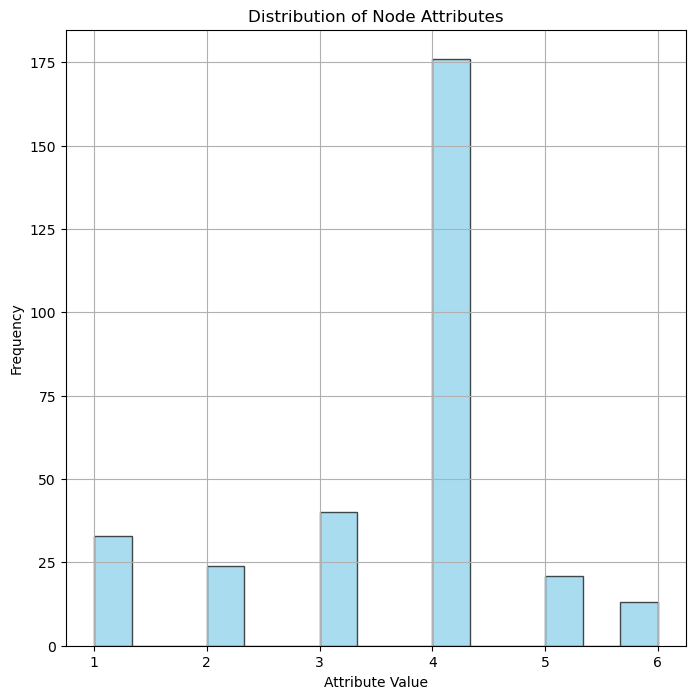

Correlation coefficient between attribute labels and degree centrality: 0.08646068052218052
Subset 1: Mean degree centrality: 0.018872549019607845, Standard deviation: 0.007684517356172001
Subset 2: Mean degree centrality: 0.013190730837789662, Standard deviation: 0.010344825760104748
Subset 3: Mean degree centrality: 0.014421252371916509, Standard deviation: 0.010370095651825022
Subset 4: Mean degree centrality: 0.02315592903828198, Standard deviation: 0.0188284937060952
Subset 5: Mean degree centrality: 0.014460784313725489, Standard deviation: 0.010803792568889308
Subset 6: Mean degree centrality: 0.024019607843137253, Standard deviation: 0.021518435360439184
ANOVA F-statistic: 3.141585114060158, p-value: 0.009060586597286644


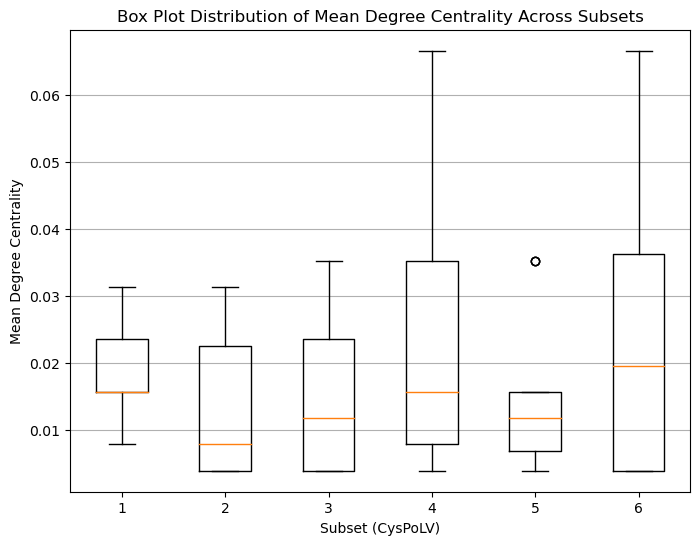

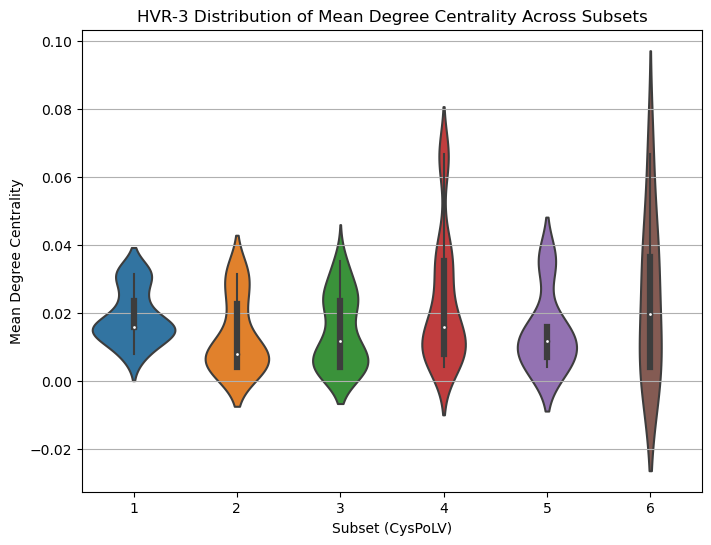

T-statistic for subsets 1 and 2: 2.270862905988438, p-value: 0.027324605292064378
T-statistic for subsets 1 and 3: 1.9088064917437881, p-value: 0.06099473951046782
T-statistic for subsets 1 and 4: -1.2571052731143326, p-value: 0.21037179807107084
T-statistic for subsets 1 and 5: 1.5943106830558196, p-value: 0.11771521814335043
T-statistic for subsets 1 and 6: -1.073197361774425, p-value: 0.28995072212346146
T-statistic for subsets 2 and 3: -0.4179718763571311, p-value: 0.6777223453970048
T-statistic for subsets 2 and 4: -2.4138017434832304, p-value: 0.01686823616688484
T-statistic for subsets 2 and 5: -0.3569433744336818, p-value: 0.7232180746873427
T-statistic for subsets 2 and 6: -1.7830725010260553, p-value: 0.08542006138952116
T-statistic for subsets 3 and 4: -2.489967465754214, p-value: 0.013703081569021102
T-statistic for subsets 3 and 5: -0.011945165862896713, p-value: 0.9905221650855391
T-statistic for subsets 3 and 6: -1.754951256395816, p-value: 0.08754588435204193
T-statisti

In [5]:
from scipy.stats import ttest_ind

attribute_mean = np.mean(labels)
attribute_std = np.std(labels)

# Visualize attribute distribution
plt.figure(figsize=(8, 8))
plt.hist(labels, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Attribute Value')
plt.ylabel('Frequency')
plt.title('Distribution of Node Attributes')
plt.grid(True)
plt.show()

degree_centrality = nx.degree_centrality(G)
degree_centrality_values = [degree_centrality[node] for node in G.nodes() if node in degree_centrality]
correlation_coefficient = np.corrcoef(labels[:len(degree_centrality_values)], degree_centrality_values)[0, 1]
print(f"Correlation coefficient between attribute labels and degree centrality: {correlation_coefficient}")

# Comparative Analysis
# # Compare network properties or attribute distributions across different HVRs or subsets
# # For example, let's compare the mean degree centrality between two subsets of nodes
# subset1_nodes = [node for node in G.nodes() if node < 100]  # Example subset 1
# subset2_nodes = [node for node in G.nodes() if node >= 100]  # Example subset 2
# subset1_degree = np.mean([degree_centrality[node] for node in subset1_nodes])
# subset2_degree = np.mean([degree_centrality[node] for node in subset2_nodes])
# print(f"Mean degree centrality for subset 1: {subset1_degree}")
# print(f"Mean degree centrality for subset 2: {subset2_degree}")
from scipy.stats import f_oneway

subset_degree_centralities = []

# Iterate over the first 6 subsets (HVRs) and compute the mean degree centrality
for i in range(1, 7):  # Considering subsets 1 to 6
    subset_nodes = [node for node in G.nodes() if z[node] == i]
    if subset_nodes:
        subset_degree = [degree_centrality[node] for node in subset_nodes]
        subset_degree_centralities.append(subset_degree)
        mean_degree = np.mean(subset_degree)
        std_degree = np.std(subset_degree)
        print(f"Subset {i}: Mean degree centrality: {mean_degree}, Standard deviation: {std_degree}")
    else:
        print(f"No nodes found in subset {i}")

# Filter out empty arrays
subset_degree_centralities = [x for x in subset_degree_centralities if x]

# Perform ANOVA test to compare mean degree centralities across subsets
if len(subset_degree_centralities) >= 2:
    f_statistic, p_value_anova = f_oneway(*subset_degree_centralities)
    print(f"ANOVA F-statistic: {f_statistic}, p-value: {p_value_anova}")
else:
    print("Insufficient data to perform ANOVA test.")

# Visualize the distribution of mean degree centralities across subsets
plt.figure(figsize=(8, 6))
plt.boxplot(subset_degree_centralities)
plt.xlabel('Subset (CysPoLV)')
plt.ylabel('Mean Degree Centrality')
plt.title('Box Plot Distribution of Mean Degree Centrality Across Subsets')
plt.xticks(range(1, len(subset_degree_centralities) + 1), range(1, len(subset_degree_centralities) + 1))
plt.grid(axis='y')
plt.show()

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(data=subset_degree_centralities)
plt.xlabel('Subset (CysPoLV)')
plt.ylabel('Mean Degree Centrality')
plt.title('HVR-3 Distribution of Mean Degree Centrality Across Subsets')
plt.xticks(range(0, len(subset_degree_centralities)), range(1, len(subset_degree_centralities) + 1))
plt.grid(axis='y')
plt.show()

# Perform statistical tests (e.g., t-test) to compare subsets
# Perform statistical tests (e.g., t-test) to compare subsets
for i in range(1, 7):
    for j in range(i+1, 7):
        subset1_nodes = [node for node in G.nodes() if z[node] == i]
        subset2_nodes = [node for node in G.nodes() if z[node] == j]
        if subset1_nodes and subset2_nodes:
            t_statistic, p_value = ttest_ind([degree_centrality[node] for node in subset1_nodes], 
                                             [degree_centrality[node] for node in subset2_nodes])
            print(f"T-statistic for subsets {i} and {j}: {t_statistic}, p-value: {p_value}")
        else:
            print(f"Insufficient data to perform t-test between subsets {i} and {j}")

In [7]:
from tabulate import tabulate

# Data for subsets
subsets = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4', 'Subset 5', 'Subset 6']
mean_degrees = [0.018872549019607845, 0.013190730837789662, 0.014421252371916509, 
                0.02315592903828198, 0.014460784313725489, 0.024019607843137253]
std_deviations = [0.007684517356172001, 0.010344825760104748, 0.010370095651825022, 
                  0.0188284937060952, 0.010803792568889308, 0.021518435360439184]

# Prepare data for tabulate
table_data = []
for subset, mean_degree, std_dev in zip(subsets, mean_degrees, std_deviations):
    table_data.append([subset, mean_degree, std_dev])

# Print the table
table = tabulate(table_data, headers=['Subset', 'Mean Degree Centrality', 'Standard Deviation'], tablefmt='pipe')
print(table)


| Subset   |   Mean Degree Centrality |   Standard Deviation |
|:---------|-------------------------:|---------------------:|
| Subset 1 |                0.0188725 |           0.00768452 |
| Subset 2 |                0.0131907 |           0.0103448  |
| Subset 3 |                0.0144213 |           0.0103701  |
| Subset 4 |                0.0231559 |           0.0188285  |
| Subset 5 |                0.0144608 |           0.0108038  |
| Subset 6 |                0.0240196 |           0.0215184  |


In [8]:
from tabulate import tabulate

# List to hold the results
results_table = []

# Populate the results table
for i in range(1, 7):
    for j in range(i+1, 7):
        subset1_nodes = [node for node in G.nodes() if z[node] == i]
        subset2_nodes = [node for node in G.nodes() if z[node] == j]
        if subset1_nodes and subset2_nodes:
            t_statistic, p_value = ttest_ind([degree_centrality[node] for node in subset1_nodes], 
                                             [degree_centrality[node] for node in subset2_nodes])
            results_table.append([f"Subsets {i} and {j}", f"{t_statistic:.4f}", f"{p_value:.4f}"])

# Print the formatted table
print(tabulate(results_table, headers=["Subset Comparison", "T-statistic", "P-value"]))

Subset Comparison      T-statistic    P-value
-------------------  -------------  ---------
Subsets 1 and 2             2.2709     0.0273
Subsets 1 and 3             1.9088     0.061
Subsets 1 and 4            -1.2571     0.2104
Subsets 1 and 5             1.5943     0.1177
Subsets 1 and 6            -1.0732     0.29
Subsets 2 and 3            -0.418      0.6777
Subsets 2 and 4            -2.4138     0.0169
Subsets 2 and 5            -0.3569     0.7232
Subsets 2 and 6            -1.7831     0.0854
Subsets 3 and 4            -2.49       0.0137
Subsets 3 and 5            -0.0119     0.9905
Subsets 3 and 6            -1.755      0.0875
Subsets 4 and 5             1.8038     0.0731
Subsets 4 and 6            -0.1246     0.901
Subsets 5 and 6            -1.3871     0.1793


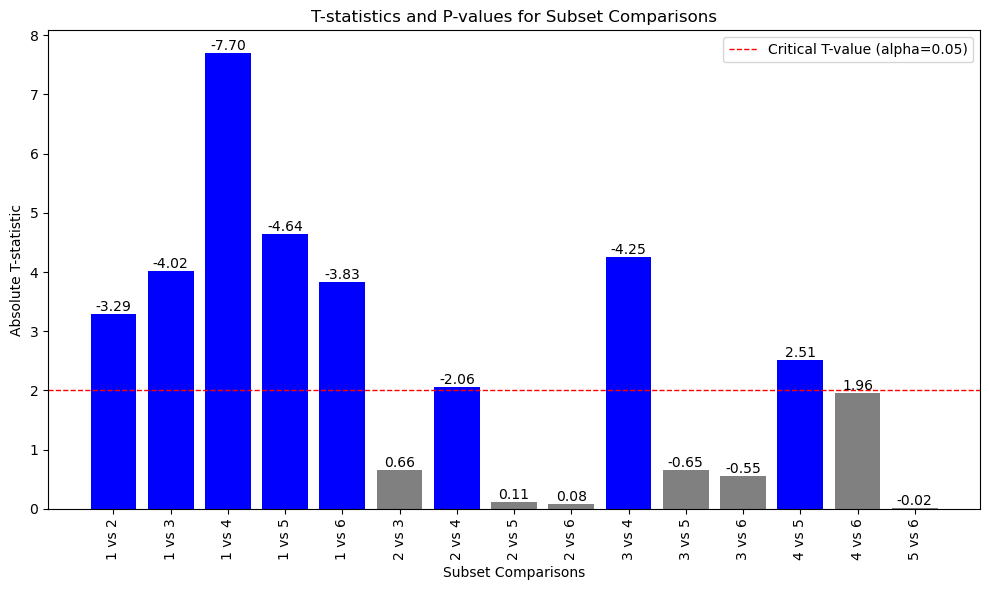

In [26]:
# Extract data from the table
subset_comparisons = ["1 vs 2", "1 vs 3", "1 vs 4", "1 vs 5", "1 vs 6",
                      "2 vs 3", "2 vs 4", "2 vs 5", "2 vs 6",
                      "3 vs 4", "3 vs 5", "3 vs 6",
                      "4 vs 5", "4 vs 6", "5 vs 6"]
t_statistics = [-3.294, -4.0169, -7.6975, -4.6406, -3.8299,
                0.6561, -2.0625, 0.1142, 0.0755,
                -4.2493, -0.6543, -0.5468,
                2.5106, 1.9588, -0.0207]
p_values = [0.0019, 0.0001, 0, 0, 0, 0.5144, 0.0405, 0.9097, 0.9403,
            0, 0.5154, 0.5869, 0.0129, 0.0516, 0.9836]

# Set significance levels
alpha = 0.05
significant_color = 'blue'
non_significant_color = 'gray'

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(subset_comparisons, np.abs(t_statistics), color=[significant_color if p < alpha else non_significant_color for p in p_values])

# Add labels and titles
plt.xlabel('Subset Comparisons')
plt.ylabel('Absolute T-statistic')
plt.title('T-statistics and P-values for Subset Comparisons')
plt.xticks(rotation=90)
plt.axhline(y=2, color='r', linestyle='--', linewidth=1, label='Critical T-value (alpha=0.05)')
plt.legend()

# Add the actual value above each bar
for bar, t_statistic in zip(bars, t_statistics):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{t_statistic:.2f}', ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()